In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("Solarize_Light2")

In [2]:
def timber(in_arr, head, tail):
    if head == tail:
        return in_arr[head]
    return sum(in_arr[head:tail+1]) - min(timber(in_arr, head+1, tail), timber(in_arr, head, tail-1))

In [ ]:
def timber_BU(in_arr, head, tail):
    # init memory
    mem = [[in_arr[row] if row == col else 0 for row in range(tail+1)] for col in range(tail+1)]
    # starting j
    start_j = 1
    while start_j < tail+1:
        # this work that i reset to 0 every time, go back to the top row
        # while j only restart where j where originally with one step a head
        j = start_j
        i = 0
        while i < tail+1 and j < tail+1:
            # relation
            if i != j and i < j:
                mem[i][j] = sum(in_arr[i:j+1]) - min(mem[i+1][j], mem[i][j-1])
            # move both j and i
            j += 1
            i += 1
        # move the next diagonal rows on the next columns
        start_j += 1
        # return result from desired input
    return mem[head][tail]

In [3]:
def perform_test(n_max, n_step):
    iter_arr = []
    time_arr = []
    for i in range(n_step, n_max+1, n_step):
        # random timber generators
        curr_arr = np.random.randint(1, 1001, size=i)
        # timer
        start_time = time.time()
        timber(curr_arr, 0, i-1)
        end_time = time.time()
        time_diff = end_time - start_time
        # record
        time_arr.append(time_diff)
        iter_arr.append(i)

        # print(f"done iter: {i}")

    return time_arr, iter_arr

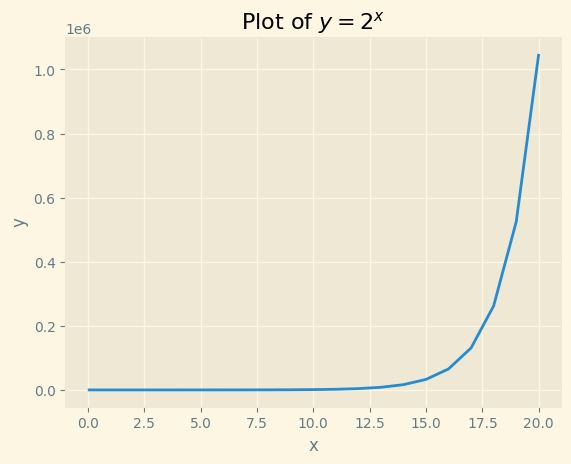

In [4]:
# Generate x values
x_values = range(0, 21, 1)  # Adjust the range as needed

# Calculate y values
y_values = [2**x for x in x_values]

# Plot the function
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = 2^x$')

# Show the plot
plt.show()

In [5]:
time_arr, iter_arr = perform_test(21, 1)

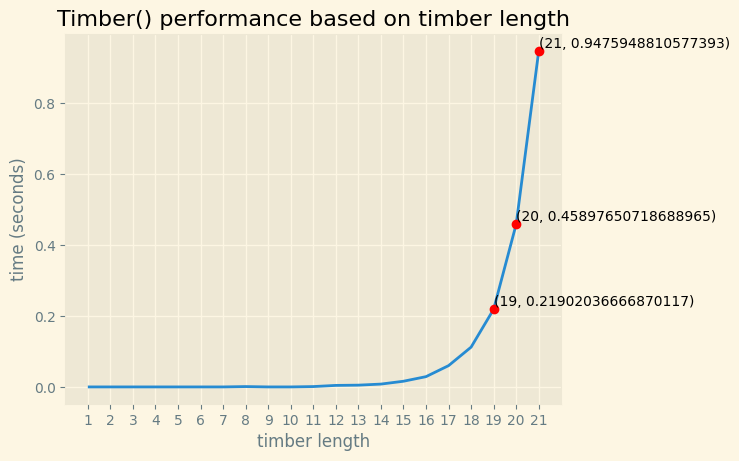

In [6]:
# plot
plt.plot(iter_arr, time_arr)
plt.plot(iter_arr[18:], time_arr[18:], 'ro')
plt.xticks(iter_arr)
plt.xlabel("timber length")
plt.ylabel("time (seconds)")
plt.title("Timber() performance based on timber length")

# Annotate the point of interest
plt.text(iter_arr[20], time_arr[20], f'({iter_arr[20]}, {time_arr[20]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[19], time_arr[19], f'({iter_arr[19]}, {time_arr[19]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[18], time_arr[18], f'({iter_arr[18]}, {time_arr[18]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.show()

In [ ]:
def perform_test_BU(n_max, n_step):
    iter_arr = []
    time_arr = []
    for i in range(n_step, n_max+1, n_step):
        # random timber generators
        curr_arr = np.random.randint(1, 1001, size=i)
        # timer
        start_time = time.time()
        timber_BU(curr_arr, 0, i-1)
        end_time = time.time()
        time_diff = end_time - start_time
        # record
        time_arr.append(time_diff)
        iter_arr.append(i)

        print(f"done iter: {i}")

    return time_arr, iter_arr

In [ ]:
time_arr, iter_arr = perform_test_BU(2000, 100)
# plot
plt.plot(iter_arr, time_arr)
plt.xticks(iter_arr)
plt.xlabel("timber length")
plt.ylabel("time (seconds)")
plt.title("Timber() performance based on timber length")
plt.show()

In [ ]:
plt.plot(iter_arr, time_arr)
plt.show()